In [1]:
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm, inv
import numpy as np

In [2]:
# Discards the smallest alpha% samples at every iteration
def bwgd_discard_iter(y, A, alpha, eta=1, niter=40):
    d, n = A.shape  
    x = np.zeros((niter, d))  
    x[0] = np.random.randn(d)
    threshold = int(alpha * n)

    # Descent
    for iter in range(1, niter):
        # Find indices for smallest |AtX|
        sorted_indices = np.argsort(np.abs(A.T @ x[iter - 1]))
        indices = sorted_indices[threshold:]

        # Discard the selected indices
        A_filtered = A.T[indices].T.copy()
        y_filtered = y[indices].copy()

        # Covariance matrix transform
        C = A_filtered @ A_filtered.T / n
        C_sqrt = sqrtm(C)
        C_inv = np.real(inv(C_sqrt))
        A_tilde = C_inv @ A_filtered 
        x_tilde = C_sqrt @ x[iter - 1]

        # Descent
        sum_gradient = A_tilde @ (np.sqrt(y_filtered) * (A_tilde.T @ x_tilde) / np.abs(A_tilde.T @ x_tilde))
        x_tilde = (1 - eta) * x_tilde + (eta / n) * sum_gradient

        x[iter] = C_inv @ x_tilde
        
    return x

In [3]:
# Discards the smallest alpha% samples at every iteration
def bwgd_discard_iter_y0(y, A, eta, niter, alpha):
    d, n = A.shape  
    x = np.zeros((niter, d))  
    x[0] = np.random.randn(d)
    threshold = int(alpha * n/2)

    # Find indices for smallest y
    sorted_indices = np.argsort(np.sqrt(y))
    y_indices = sorted_indices[threshold:]
    A = A.T[y_indices].T.copy()
    y = y[y_indices].copy()
    
    # Descent
    for iter in range(1, niter):
        # Find indices for smallest |AtX|
        sorted_indices = np.argsort(np.abs(A.T @ x[iter - 1]))
        A_indices = sorted_indices[threshold:]

        # Discard the selected indices
        A_filtered = A.T[A_indices].T.copy()
        y_filtered = y[A_indices].copy()

        # Covariance matrix transform
        C = A_filtered @ A_filtered.T / n
        C_sqrt = sqrtm(C)
        C_inv = np.real(inv(C_sqrt))
        A_tilde = C_inv @ A_filtered 
        x_tilde = C_sqrt @ x[iter - 1]

        # Descent
        sum_gradient = A_tilde @ (np.sqrt(y_filtered) * (A_tilde.T @ x_tilde) / np.abs(A_tilde.T @ x_tilde))
        x_tilde = (1 - eta) * x_tilde + (eta / n) * sum_gradient

        x[iter] = C_inv @ x_tilde
        
    return x

In [4]:
# Discards the smallest alpha% samples at x0
def bwgd_discard_x0(y, A, eta, niter, alpha):
    d, n = A.shape  
    x = np.zeros((niter, d))  
    x[0] = np.random.randn(d)
    
    # Find indices for smallest |AtX|
    sorted_indices = np.argsort(np.abs(A.T @ x[0]))
    threshold = int(alpha * n)
    indices = sorted_indices[threshold:]

    # Discard the selected indices
    A_filtered = A.T[indices].T.copy()
    y_filtered = y[indices].copy()

    # Covariance matrix transform
    C = A_filtered @ A_filtered.T / n
    C_sqrt = sqrtm(C)
    C_inv = np.real(inv(C_sqrt))
    A_tilde = C_inv @ A_filtered 
    x_tilde = C_sqrt @ x[0]

    # Descent
    for iter in range(1, niter):
        # Descent
        sum_gradient = A_tilde @ (np.sqrt(y_filtered) * (A_tilde.T @ x_tilde) / np.abs(A_tilde.T @ x_tilde))
        x_tilde = (1 - eta) * x_tilde + (eta / n) * sum_gradient

        x[iter] = C_inv @ x_tilde
        
    return x

In [5]:
# Discards the smallest alpha% samples at x0
def bwgd_discard_x0_y0(y, A, eta, niter, alpha):
    d, n = A.shape  
    x = np.zeros((niter, d))  
    x[0] = np.random.randn(d)
    threshold = int(n * alpha/2)

    # Find indices for smallest |AtX|
    sorted_indices = np.argsort(np.abs(A.T @ x[0]))
    A_indices = sorted_indices[threshold:]

    # Find indices for smallest y
    sorted_indices = np.argsort(np.sqrt(y))
    y_indices = sorted_indices[threshold:]

    # Combine both sets of indices
    selected_indices = np.unique(np.concatenate((A_indices, y_indices)))

    # Discard the selected indices
    A_filtered = A.T[selected_indices].T.copy()
    y_filtered = y[selected_indices].copy()

    # Covariance matrix transform
    C = A_filtered @ A_filtered.T / n
    C_sqrt = sqrtm(C)
    C_inv = np.real(inv(C_sqrt))
    A_tilde = C_inv @ A_filtered 
    x_tilde = C_sqrt @ x[0]

    # Descent
    for iter in range(1, niter):
        # Descent
        sum_gradient = A_tilde @ (np.sqrt(y_filtered) * (A_tilde.T @ x_tilde) / np.abs(A_tilde.T @ x_tilde))
        x_tilde = (1 - eta) * x_tilde + (eta / n) * sum_gradient

        x[iter] = C_inv @ x_tilde
        
    return x

In [6]:
# Take minimum error for positive and negative x
def min_error(x_hat, x_star):
    errors = []
    for x in x_hat:
            error_positive = np.linalg.norm(x_star - x)
            error_negative = np.linalg.norm(-1*x_star - x)
            errors.append(min(error_positive, error_negative))
    return errors

In [7]:
# Returns the convergence count for errors for a set of test parameters
def convergence_counts(errors, parameter):
    zero_error = {}
    for i in range(len(errors)):
        zero_error[parameter[i]] = 0
        for error in errors[i]:
            zero_error[parameter[i]] += error[-1] < 1e-11
    return zero_error

**Varying Thresholds**

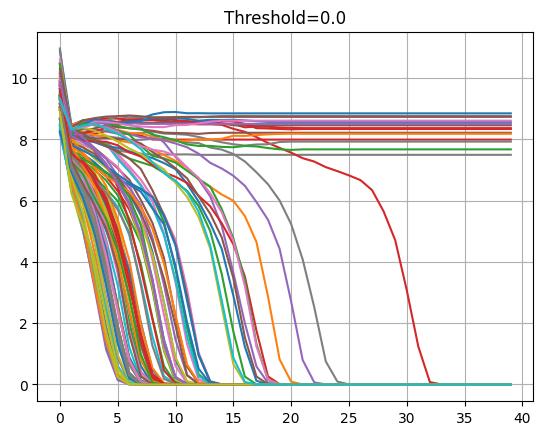

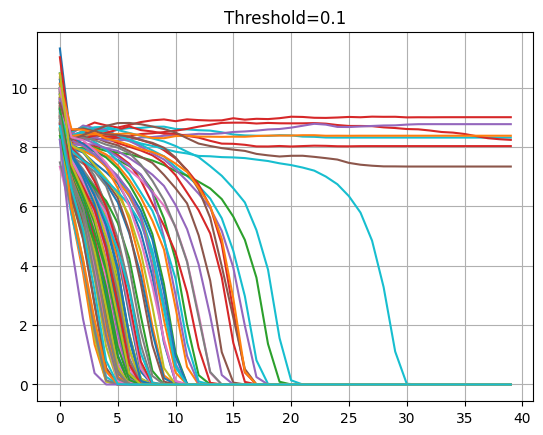

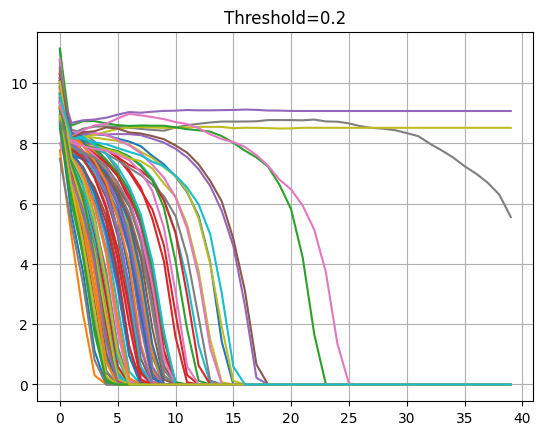

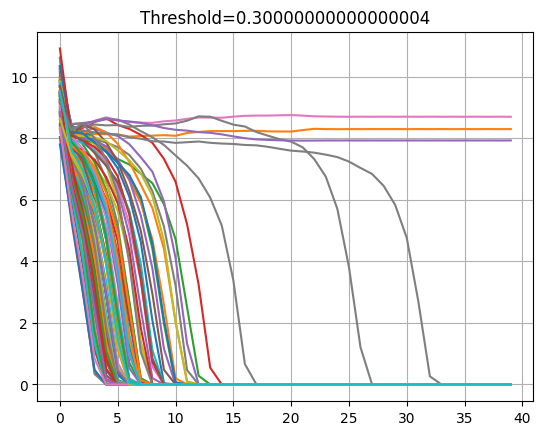

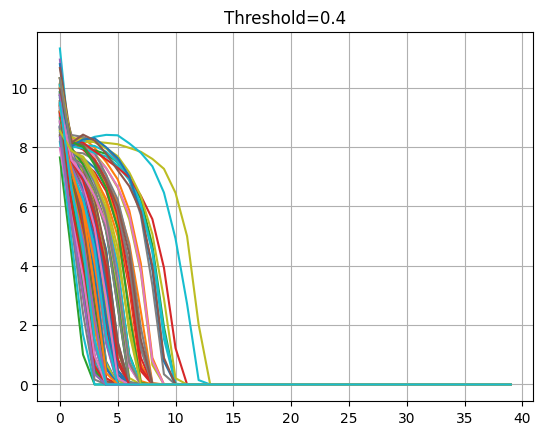

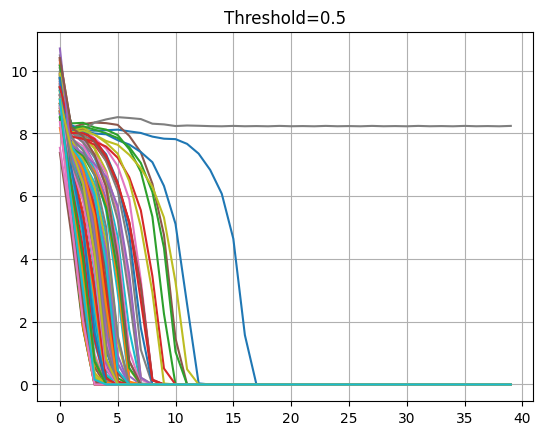

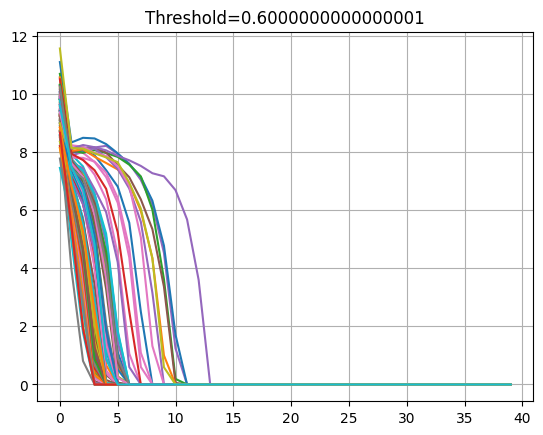

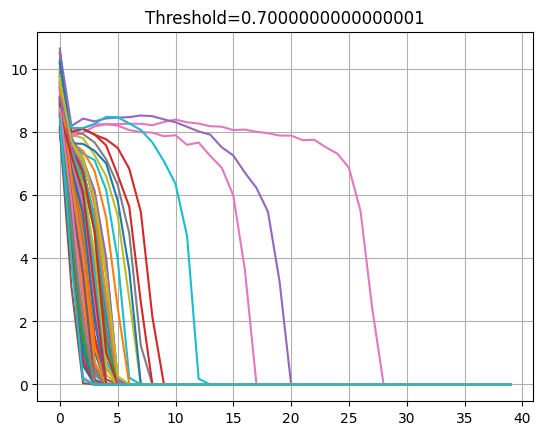

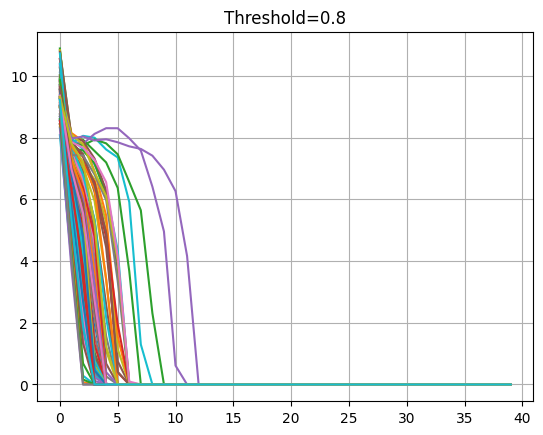

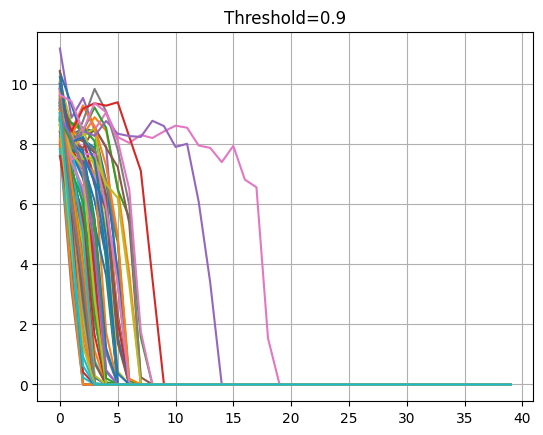

{0.0: 85,
 0.1: 93,
 0.2: 97,
 0.30000000000000004: 97,
 0.4: 100,
 0.5: 99,
 0.6000000000000001: 100,
 0.7000000000000001: 100,
 0.8: 100,
 0.9: 100}

In [24]:
n = 1000
d = 50
errors = []
thresholds =  np.arange(0, 10)*0.1

for threshold in thresholds:
    threshold_error = []
    for j in range(1, 101):  
        # Generate vectors
        x = np.ones(d)
        A = np.random.randn(d, n)
        y = np.square(A.T @ x)
        
        # Run the algorithm
        x_hat = bwgd_discard_iter(y, A, threshold)

        error = min_error(x_hat, x)
        threshold_error.append(error)
        
        # Plot results
        plt.plot(error)

    errors.append(threshold_error)

    plt.title(f'Threshold={threshold}')
    plt.grid(True)
    plt.show()

convergence_counts(errors, thresholds)

**Phase Transitions**

In [11]:
def phase_transition(bwgd_discard, samples, alphas, niter=100, d=50,):
    # Matrix for convergence in samples x alphas
    convergence = np.zeros((len(samples), len(alphas)))
    x_true = np.ones(d)
    
    for i, n in enumerate(samples):
        for j, alpha in enumerate(alphas):
            converged = 0
            for _ in range(niter):
                # Generate random samples A and response y
                A = np.random.randn(d, n)
                y = (A.T @ x_true)**2  
                
                # Run algorithm
                x_hat = bwgd_discard(y, A, alpha)

                # Check for convergence
                if min_error(x_hat, x_true)[-1] < 1e-11:
                    converged += 1 

            convergence[i, j] = converged
            
    return convergence
    

In [14]:
samples = np.arange(100, 1100, 100)  
alphas = np.arange(0, 10) * 0.1  
convergence = phase_transition(bwgd_discard_iter, samples, alphas)

C:\Users\gabreu\AppData\Local\Temp\ipykernel_25468\2887953581.py:29: ComplexWarning: Casting complex values to real discards the imaginary part
  x[iter] = C_inv @ x_tilde


array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   2.,   9.,  27.,  36.,  30.,  20.,  46.,   0.,   0.],
       [  8.,  35.,  52.,  58.,  70.,  73.,  81.,  73.,  96.,   0.],
       [ 23.,  58.,  74.,  74.,  79.,  90.,  95.,  93.,  92.,   0.],
       [ 47.,  77.,  87.,  89.,  96.,  98.,  94.,  96., 100.,   1.],
       [ 59.,  88.,  96.,  98.,  95.,  98., 100., 100.,  98., 100.],
       [ 77.,  88.,  98.,  97.,  96.,  99., 100., 100., 100., 100.],
       [ 80.,  97.,  96.,  98., 100.,  97., 100., 100., 100., 100.],
       [ 88.,  98.,  97.,  99.,  98., 100., 100., 100., 100., 100.],
       [ 88.,  98.,  98., 100., 100., 100., 100., 100., 100., 100.]])

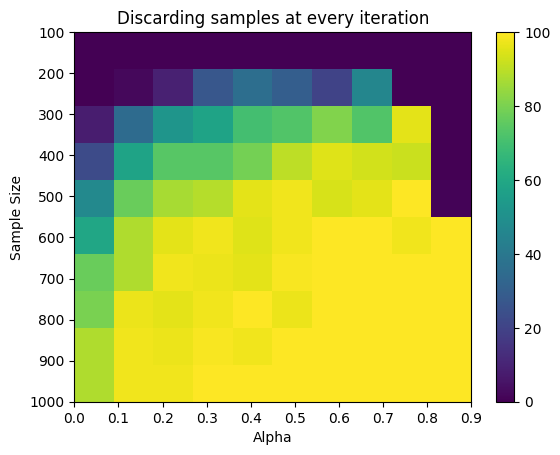

In [16]:
im = plt.imshow(convergence, extent=[alphas[0], alphas[-1], samples[-1], samples[0]], aspect='auto')
plt.colorbar()
plt.xlabel('Alpha')
plt.ylabel('Sample Size')
plt.title('Discarding samples at every iteration')
convergence

Text(0.5, 1.0, 'Discarding samples from Ax0 at initial')

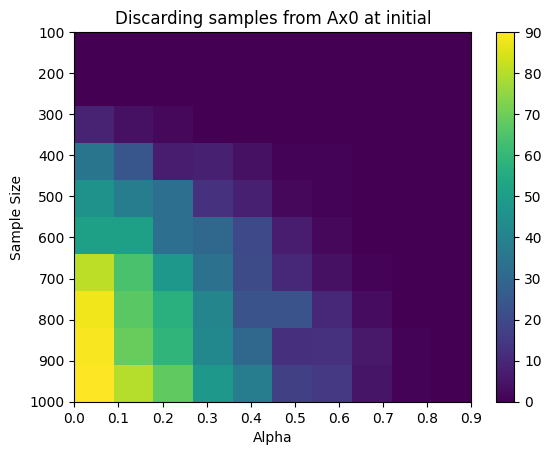

In [207]:
im = plt.imshow(convergence1, extent=[alphas[0], alphas[-1], samples[-1], samples[0]], aspect='auto')
plt.colorbar()
plt.xlabel('Alpha')
plt.ylabel('Sample Size')
plt.title('Discarding samples from Ax0 at initial')

Text(0.5, 1.0, 'Discarding samples from Ax0 and y')

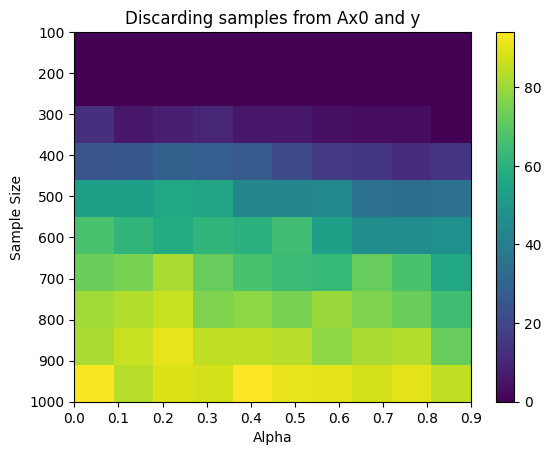

In [195]:
im = plt.imshow(convergence2, extent=[alphas[0], alphas[-1], samples[-1], samples[0]], aspect='auto')
plt.colorbar()
plt.xlabel('Alpha')
plt.ylabel('Sample Size')
plt.title('Discarding samples from Ax0 and y')